In [8]:
from pklshop.data import *
from pklshop.stats import *
from pklshop.name import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fs_win_frac = [team_first_serve_win_frac(team_id) for team_id in team.team_id]
team['fs_win_frac'] = fs_win_frac

In [3]:
team.sort_values('fs_win_frac', ascending=False)

,team_id,player_id,player_seq_nbr,team_nm,maint_dtm,maint_app,create_dtm,create_app,fs_win_frac
93,T47,P8,2,Steve Deakin & Matt Wright,2022-11-21 19:35:11.100373+00:00,aspancake,2022-11-21 19:35:11.100373+00:00,aspancake,1.0
74,T38,P59,1,Mike Strain & Payton Noyes,2022-10-16 19:22:34.935319+00:00,postgres,2022-10-16 19:22:34.935319+00:00,postgres,1.0
84,T43,P66,1,Chuck Taylor & AJ Koller,2022-11-07 02:44:58.941454+00:00,aspancake,2022-11-07 02:44:58.941454+00:00,aspancake,1.0
24,T13,P23,1,Collin Johns & Ben Johns,2022-08-08 03:10:56.810337+00:00,postgres,2022-08-08 03:10:56.810337+00:00,postgres,1.0
25,T13,P24,2,Collin Johns & Ben Johns,2022-08-08 03:10:56.815196+00:00,postgres,2022-08-08 03:10:56.815196+00:00,postgres,1.0
...,...,...,...,...,...,...,...,...,...
39,T20,P2,2,Irina Tereschenko & Catherine Parenteau,2022-08-29 22:54:29.997848+00:00,postgres,2022-08-29 22:54:29.997848+00:00,postgres,0.0
38,T20,P30,1,Irina Tereschenko & Catherine Parenteau,2022-08-29 22:54:29.989467+00:00,postgres,2022-08-29 22:54:29.989467+00:00,postgres,0.0
37,T19,P30,2,Lauren Stratman & Irina Tereschenko,2022-08-21 23:41:00.095069+00:00,postgres,2022-08-21 23:41:00.095069+00:00,postgres,0.0
36,T19,P28,1,Lauren Stratman & Irina Tereschenko,2022-08-21 23:40:50.865255+00:00,postgres,2022-08-21 23:40:50.865255+00:00,postgres,0.0


In [4]:
pro_games = game[game.skill_lvl == "Pro"]
amateur_games = game[game.skill_lvl != "Pro"]

first_serve_win_frac_overall = get_frac_first_serve_wins(game)
first_serve_win_frac_pro = get_frac_first_serve_wins(pro_games)
first_serve_win_frac_amateur = get_frac_first_serve_wins(amateur_games)

In [5]:
print("The first serve win percentage overall is {:.2f}% for {} games.".format(first_serve_win_frac_overall*100, len(game)))
print("The first serve win percentage for Pros is {:.2f}% for {} games.".format(first_serve_win_frac_pro*100, len(pro_games)))
print("The first serve win percentage for Amateurs is {:.2f}% for {} games.".format(first_serve_win_frac_amateur*100, len(amateur_games)))

The first serve win percentage overall is 57.41% for 54 games.
The first serve win percentage for Pros is 51.28% for 39 games.
The first serve win percentage for Amateurs is 73.33% for 15 games.


In [6]:
colors = sns.color_palette('pastel')

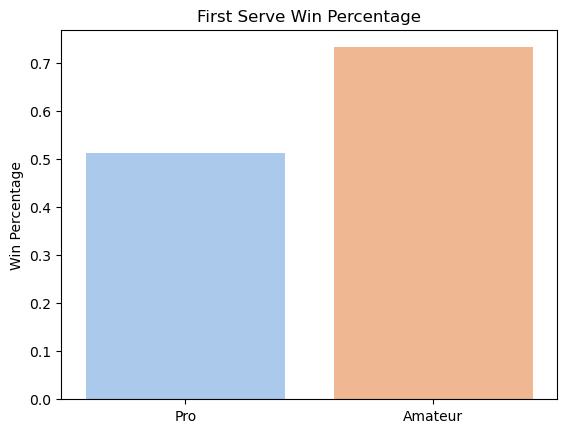

In [7]:
sns.barplot(x=[ 'Pro', 'Amateur'], y=[first_serve_win_frac_pro, first_serve_win_frac_amateur], palette=colors)
plt.title("First Serve Win Percentage")
plt.ylabel("Win Percentage")
# plt.savefig('figures/first_serve_win_percentage.pdf')
plt.show()


Now let's see how Jessie Irvine compares to the average

In [16]:
player_name_test = "Jesse Irvine"
player_id_test = get_player_id(player_name_test)

In [17]:
#Find the teams that Jesse Irvine played for
team_ids_test = get_teams_from_player(player_id_test)
for team_id in team_ids_test:
    print(get_team_name(team_id))

Jesse Irvine & Catherine Parenteau
Jesse Irvine & Anna Bright
Jesse Irvine & Lucy Kovalova


In [18]:
#| export
def games_played_by_team(team_id):
    '''
    Returns the number of games played by a team with team_id.
    '''
    return len(game[(game.w_team_id == team_id) | (game.l_team_id == team_id)])

In [19]:
net_games_played = sum([games_played_by_team(team_id) for team_id in team_ids_test]) #Number of games played by Jesse Irvine on any team
avg_first_serve_win_frac_test = sum([team_first_serve_win_frac(team_id)* games_played_by_team(team_id) for team_id in team_ids_test])/net_games_played #Average first serve win frac for Jesse Irvine
avg_tot_win_frac_test = sum([team_win_frac(team_id)* games_played_by_team(team_id) for team_id in team_ids_test])/net_games_played #Average total win frac for Jesse Irvine
print("{}'s average first serve win percentage is {:.2f}%".format(player_name_test, avg_first_serve_win_frac_test*100))
print("{}'s average overall win percentage is {:.2f}%".format(player_name_test, avg_tot_win_frac_test*100))


Jesse Irvine's average first serve win percentage is 33.33%
Jesse Irvine's average overall win percentage is 66.67%


In [21]:
first_serve_win_frac = get_frac_first_serve_wins(game)
print("The first serving team won {:.2f}% of games".format(first_serve_win_frac*100))

The first serving team won 57.41% of games


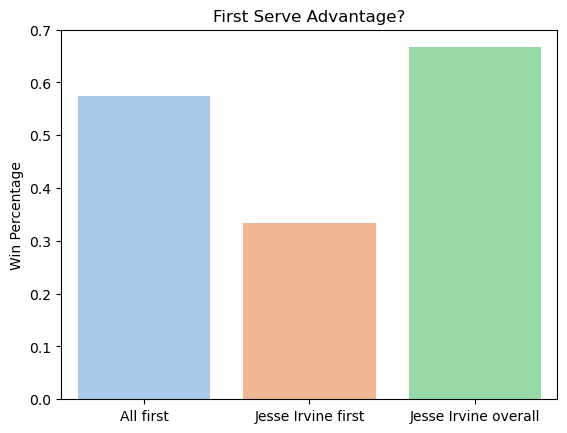

In [22]:
sns.barplot(x=['All first', player_name_test + " first", player_name_test + " overall"], y=[first_serve_win_frac, avg_first_serve_win_frac_test, avg_tot_win_frac_test], palette=colors)
plt.title("First Serve Advantage?")
plt.ylabel("Win Percentage")
# plt.savefig('figures/first_serve_win_percentage.pdf')
plt.show()

Looks like Jessie Irvine plays better when her team serves 2nd! (Given this limited dataset)